# DNN 구현(1)

## 실습 개요

1) **실습 목적**

이번 실습은 이론으로 배웠던 PyTorch를 이용한 딥러닝 모델 구현 중 Dataset, DataLoader와 Custom model을 직접 구현합니다. 이를 위해 torchvision 라이브러리의 MNIST Dataset을 사용하여 DataLoader를 정의합니다. 그 후 모델을 정의하여 커스텀 모델 생성, 가중치 초기화를 다룹니다.🙂



2) **수강 목표**

- torchvision 라이브러리를 사용하여 구현된 Dataset을 가져올 수 있다.
- DataLoader를 정의하고 사용하는 인자에 대해 이해할 수 있다.
- Custom model을 직접 구현할 수 있다.
- Custom model의 파라미터를 다양한 방법으로 초기화할 수 있다.

### 실습 목차
* 1. 데이터
  * 1-1. torchvision 라이브러리를 사용하여 MNIST Dataset 불러오기
  * 1-2. 불러온 Dataset를 사용하여 DataLoader를 정의하고 DataLoader의 인자에 대한 이해

* 2. 모델
  * 2-1. nn.Module을 사용하여 Custom model 정의
  * 2-2. 모델의 파라미터 초기화

### 환경 설정

- 패키지 설치 및 임포트

In [2]:
#!pip install torch==2.0.1 -q
!pip install torchvision==0.15.2 -q

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/PyBioMed-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [1]:
import matplotlib.pyplot as plt # 시각화를 위한 라이브러리

import torch # PyTorch 라이브러리
import torch.nn as nn # 모델 구성을 위한 라이브러리
from torch.utils.data import DataLoader # optimizer 설정을 위한 라이브러리

import torchvision # PyTorch의 컴퓨터 비전 라이브러리
import torchvision.transforms as T # 이미지 변환을 위한 모듈
import torchvision.utils as vutils # 이미지를 쉽게 처리하기 위한 유틸리티 모듈

In [2]:
# seed 고정
import random
import torch.backends.cudnn as cudnn

def random_seed(seed_num):
    torch.manual_seed(seed_num)
    torch.cuda.manual_seed(seed_num)
    torch.cuda.manual_seed_all(seed_num)
    cudnn.benchmark = False
    cudnn.deterministic = True
    random.seed(seed_num)

random_seed(42)

## 1. 데이터

```
💡 목차 개요: torchvision 라이브러리를 사용해 구현된 Dataset을 불러온 후, DataLoader를 정의할 수 있다.
```

- 1-1. torchvision 라이브러리를 사용하여 구현된 Dataset 불러오기
- 1-2. 불러온 Dataset을 사용하여 DataLoader 정의하기


### 1-1 torchvision 라이브러리를 사용하여 구현된 Dataset 불러오기

> `torchvision.datasets`은 다양한 비전 Dataset을 제공합니다. 이 모듈을 통해 간편하게 데이터를 다운로드하고 `Dataset`을 불러올 수 있습니다.



###  데이터 셋 개요 </b>

* 데이터 셋: MNIST 데이터베이스(Modified National Institute of Standards and Technology database)
* 데이터 셋 개요: MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋입니다. 총 6만 개의 학습 데이터와 1만 개의 테스트 데이터로 이루어져 있으며 [이미지]와 [숫자에 대한 라벨]로 구성됩니다.
* 데이터 셋 저작권: CC BY-SA 3.0
* [MNIST - 위키피디아](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)




#### 📝 설명: torchvision의 datasets 모듈
`torchvision.datasets`를 사용하면 다양한 비전 Dataset을 불러올 수 있습니다. 그 중에서 MNIST Dataset을 불러와 실습해보도록 하겠습니다.
MNIST Dataset 외에도 CIFAR10, CIFAR100, ImageNet 등 Dataset들도 편리하게 불러올 수 있습니다.

- `torchvision.datasets.CIFAR10`
- `torchvision.datasets.CIFAR100`
- `torchvision.datasets.ImageNet`
- ..



📚 참고할만한 자료:
* [torchvision.datasets - PyTorch 공식 문서](https://pytorch.org/vision/stable/datasets.html): 소개한 Dataset 이 외에도 다양한 Dataset이 존재합니다. '좌측 링크'에서 불러올 수 있는 Dataset을 확인할 수 있습니다.
* [torch.utils.data.random_split - PyTorch 공식 문서](https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split)

In [3]:
# 데이터를 불러올 때, 필요한 변환(transform)을 정의합니다.
mnist_transform = T.Compose([
    T.ToTensor(), # 텐서 형식으로 변환
])

In [4]:
# torchvision 라이브러리를 사용하여 MNIST Dataset을 불러옵니다.
download_root = './MNIST_DATASET'

train_dataset = torchvision.datasets.MNIST(download_root, transform=mnist_transform, train=True, download=True) # train dataset 다운로드
test_dataset = torchvision.datasets.MNIST(download_root, transform=mnist_transform, train=False, download=True) # test dataset 다운로드

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2209668.42it/s]


Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 136440.19it/s]


Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1589710.99it/s]


Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2512599.42it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



In [17]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [18]:
type(train_dataset[0])

tuple

In [5]:
for image, label in train_dataset:
  print(image.shape, label)  # 여기서 image의 shape은 [C, H, W]로 구성됨
  break

torch.Size([1, 28, 28]) 5


In [6]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST_DATASET
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
# 데이터 셋을 학습 데이터 셋과 검증 데이터 셋으로 분리합니다.
total_size = len(train_dataset)
train_num, valid_num = int(total_size * 0.8), int(total_size * 0.2) # 8 : 2 = train : valid
print("Train dataset 개수 : ",train_num)
print("Validation dataset 개수 : ",valid_num)
train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [train_num, valid_num]) # train - valid set 나누기

Train dataset 개수 :  48000
Validation dataset 개수 :  12000


### 1-2 불러온 Dataset을 사용하여 DataLoader 정의하기

> `DataLoader`는 인자로 주어진 `Dataset`을 이용하여, 단일 데이터들을 정해진 개수만큼 모아 미니 배치(mini-batch)를 구성하는 역할을 합니다. `torch.utils.data` 라이브러리를 사용하여 편리하게 DataLoader를 구현할 수 있습니다.



#### 📝 설명: PyTorch DataLoader의 인자
`torchvision.datasets`를 통해 불러온 `Dataset`을 `DataLoader`의 인자로 필수로 넘겨줘야 합니다. 이 외에도 `DataLoader`에는 추가 인자들이 존재합니다.

- `batch_size`: 미니 배치의 크기를 나타냅니다. 별도의 선언이 없을 경우, 1로 지정됩니다.
- `shuffle`: epoch마다 데이터의 순서가 섞이는 여부를 나타냅니다. 학습에 사용하는 데이터로더의 경우에는 모델이 학습 데이터의 순서에 의존하지 않도록 하기위해 셔플을 진행합니다.
- `num_workers`: 데이터 로딩에 사용하는 서브 프로세스 개수를 나타냅니다.
- `drop_last`: 마지막 미니 배치의 데이터 수가 미니 배치 크기보다 작은 경우, 데이터를 버릴지 말지를 나타냅니다.
- `pin_memory`: PyTorch의 DataLoader에서 GPU를 사용하는 경우 데이터 로딩 속도를 높이는 옵션입니다. `pin_memory=True`를 설정하면, DataLoader는 데이터를 CUDA 고정 메모리(CUDA pinned memory)에 로드하여 CPU 메모리에서 GPU 메모리로 데이터를 더 빠르게 전송할 수 있습니다.
- ..


📚 참고할만한 자료:
* [torch.utils.data.DataLoader - PyTorch 공식 문서](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): 소개한 인자 외에도 추가적인 인자들이 존재합니다.
* [pin_memory 옵션](https://developer.nvidia.com/blog/how-optimize-data-transfers-cuda-cc/): 해당 내용은 운영 체제의 가상 메모리(virtual memory)와 스와핑(swapping) 개념을 이해한 후, 살펴보면 좋습니다.

In [8]:
batch_size = 32

# 앞서 선언한 Dataset을 인자로 주어 DataLoader를 선언합니다.
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
valid_dataloader = DataLoader(valid_dataset, batch_size = batch_size, shuffle = False)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

In [9]:
# 학습 데이터로더에서 일부의 미니 배치 데이터를 가져옵니다.
for images, labels in train_dataloader:
  print(images.shape, labels.shape)
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


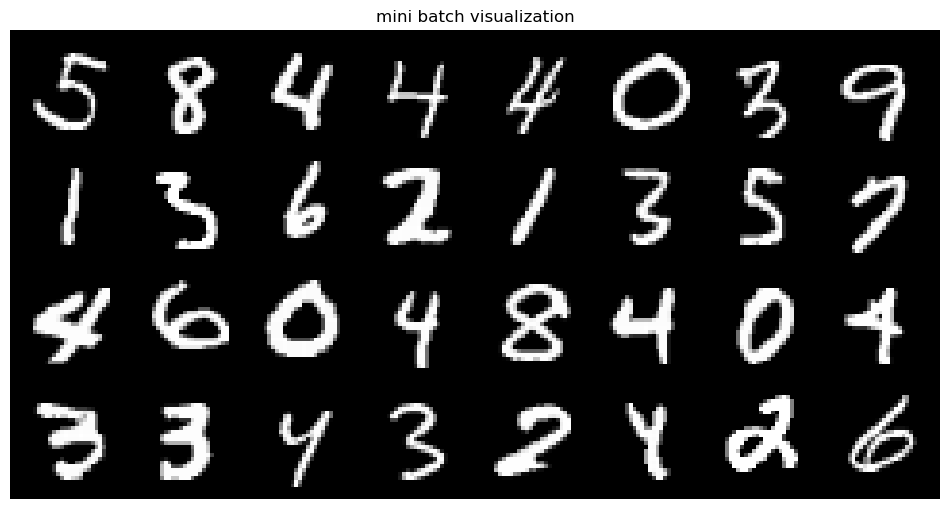

In [10]:
grid = vutils.make_grid(images, nrow=8) # 각 행마다 8개의 이미지 배치하여 격자로 구성합니다.

# 학습 데이터로더로 부터 불러온 이미지를 시각화합니다
plt.figure(figsize=(12,12))
plt.imshow(grid.numpy().transpose((1,2,0)))
plt.title("mini batch visualization")
plt.axis('off')
plt.show()

## 2. 모델

```
💡 목차 개요: MNIST 숫자 이미지 데이터를 분류하기 위해 필요한 모델을 직접 구현합니다.
```

- 2-1. nn.Module을 사용하여 Custom model 정의
- 2-2. 모델의 파라미터 초기화


### 2-1 nn.Module을 사용하여 Custom model 정의

> PyTorch의 `nn.Module`을 상속받아 MNIST 숫자 이미지 데이터를 분류하는 모델을 구현합니다.



#### 📝 설명: Custom model 정의
MNIST 숫자 이미지 데이터를 분류하는 모델을 구현합니다. 일반적으로 이미지 데이터를 처리하는 모델로 CNN(Convolution Neural Network)을 많이 사용합니다. 이번 실습에서는 CNN을 사용하기 전에 fully connected layers로 구성된 DNN(Deep Neural Network)을 먼저 구현해 봅니다.

MNIST 숫자 이미지 데이터는 28 $\times$ 28 크기를 갖는 2D matrix입니다. DNN의 입력으로 사용하기 위해 matrix를 1차원으로 펼쳐야 합니다. 입력 데이터를 펼치기 위해 `forward`의 첫 연산으로 `x = x.view(x.shape[0], -1)`를 진행합니다.


**참고 사항**

DNN 모델을 설계할 때, 레이어의 개수는 하이퍼 파라미터의 일종입니다. 레이어의 개수는 모델의 복잡성과 관련이 있으며, 레이어를 너무 많이 쌓거나 너무 적게 쌓는 경우 문제가 발생할 수 있습니다.
- **레이어를 너무 깊게 쌓을 경우**: 모델의 복잡성이 증가하여 오버피팅의 위험이 증가할 수 있습니다. 또한 gradient vanishing, exploding의 문제가 발생할 수 있습니다.
-  **레이어를 너무 적게 쌓을 경우**: 모델이 너무 단순하여 학습 데이터의 패턴을 충분히 포착하지 못하는 현상인 언더피팅이 발생할 수 있습니다. 이에 따라 일반화 성능이 제한될 수 있습니다.


**주의 사항**

`nn.Linear`를 통해 레이어를 정의할 때는 입력 데이터의 차원과 레이어의 입력 차원이 일치해야 합니다.

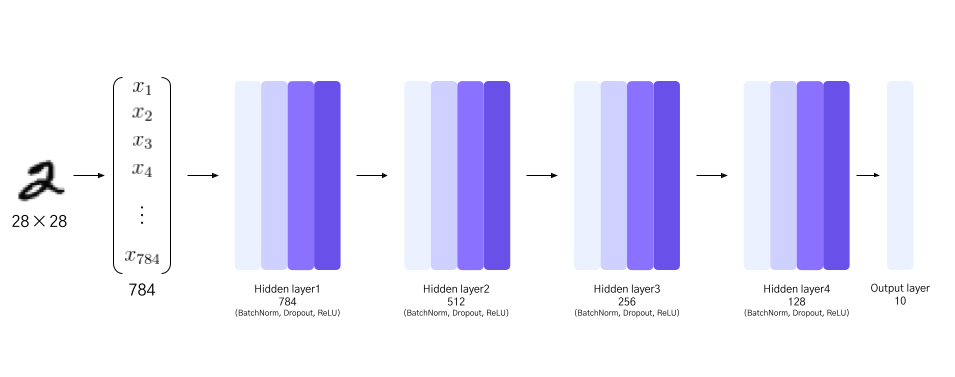

In [15]:
class DNN(nn.Module):
  def __init__(self, hidden_dim, num_classes, dropout_ratio, apply_batchnorm, apply_dropout, apply_activation, set_super):
    if set_super:
      super().__init__()
    # Fully connected layer를 선언합니다.
    self.fc1 = nn.Linear(28 * 28, hidden_dim * 4)
    self.fc2 = nn.Linear(hidden_dim * 4, hidden_dim * 2)
    self.fc3 = nn.Linear(hidden_dim * 2, hidden_dim)
    self.classifier = nn.Line각ar(hidden_dim, num_classes)

    # Batch normalization을 선언합니다. apply_batchnorm 인자가 False일 경우, batch normalization은 적용되지 않습니다.
    self.batchnorm1 = nn.BatchNorm1d(hidden_dim * 4) if apply_batchnorm else nn.Identity()
    self.batchnorm2 = nn.BatchNorm1d(hidden_dim * 2) if apply_batchnorm else nn.Identity()
    self.batchnorm3 = nn.BatchNorm1d(hidden_dim) if apply_batchnorm else nn.Identity()

    # Dropout은 레이어를 통과한 중간 연산 결과를 dropout_ratio 만큼의 비율로 element를 '0'으로 변경합니다. 학습을 규제하여 일반화 성능을 높이고 싶을 때 사용합니다.
    # Dropout을 선언합니다. apply_dropout 인자가 False일 경우, dropout은 적용되지 않습니다.
    self.dropout1 = nn.Dropout(dropout_ratio) if apply_dropout else nn.Identity()
    self.dropout2 = nn.Dropout(dropout_ratio) if apply_dropout else nn.Identity()
    self.dropout3 = nn.Dropout(dropout_ratio) if apply_dropout else nn.Identity()

    # Activation function을 선언합니다. apply_activation 인자가 False일 경우, activation function은 적용되지 않습니다.
    self.activation1 = nn.ReLU() if apply_activation else nn.Identity()
    self.activation2 = nn.ReLU() if apply_activation else nn.Identity()
    self.activation3 = nn.ReLU() if apply_activation else nn.Identity()

    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, x):
    """
    Input and Output Summary

    Input:
      x: [batch_size, 1, 28, 28]
    Output:
      output: [batch_size, num_classes]

    """
    x = x.view(x.shape[0], -1)  # [batch_size, 784]

    x = self.fc1(x) # [batch_size, dim * 4]
    x = self.batchnorm1(x)
    x = self.activation1(x)
    x = self.dropout1(x)

    x = self.fc2(x) # [batch_size, dim * 2]
    x = self.batchnorm2(x)
    x = self.activation2(x)
    x = self.dropout2(x)

    x = self.fc3(x) # [batch_size, dim]
    x = self.batchnorm3(x)
    x = self.activation3(x)
    x = self.dropout3(x)

    x = self.classifier(x) # [batch_size, 10]
    output = self.softmax(x)
    return output

In [16]:
class DNN(nn.Module):
  def __init__(self, hidden_dims, num_classes, dropout_ratio, apply_batchnorm, apply_dropout, apply_activation, set_super):
    if set_super:
      super().__init__()

    self.hidden_dims = hidden_dims
    self.layers = nn.ModuleList()

    for i in range(len(self.hidden_dims) - 1):
      self.layers.append(nn.Linear(self.hidden_dims[i], self.hidden_dims[i+1]))

      if apply_batchnorm:
        self.layers.append(nn.BatchNorm1d(self.hidden_dims[i+1]))

      if apply_activation:
        self.layers.append(nn.ReLU())

      if apply_dropout:
        self.layers.append(nn.Dropout(dropout_ratio))

    self.classifier = nn.Linear(self.hidden_dims[-1], num_classes)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, x):
    """
    Input and Output Summary

    Input:
      x: [batch_size, 1, 28, 28]
    Output:
      output: [batch_size, num_classes]

    """
    x = x.view(x.shape[0], -1)  # [batch_size, 784]

    for layer in self.layers:
      x = layer(x)

    x = self.classifier(x) # [batch_size, 10]
    output = self.softmax(x) # [batch_size, 10]
    return output


In [17]:
# 모델을 선언한 후, MNIST 숫자 이미지 데이터와 동일한 크기의 random Tensor를 입력으로 넣어 연산상 문제가 없는지 확인합니다.
hidden_dim = 128
hidden_dims = [784, hidden_dim * 4, hidden_dim * 2, hidden_dim]
model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = True, apply_activation = True, set_super = True)
output = model(torch.randn((32, 1, 28, 28)))

#### 📝 설명: `super().__init__()`
`super().__init__()`은 부모 클래스(nn.Module)를 초기화하는 코드입니다. 부모 클래스의 `__init__`에서는 파라미터, 버퍼, 서브 모듈 등을 자동으로 등록하고 추적하는 기능을 제공하기 때문에, 커스텀 모델에서 서브 모듈(e.g. nn.Linear, nn.BatchNorm1d ..)을 사용하기 위해서는 부모 클래스를 초기화해야 합니다.

부모 클래스를 초기화하지 않을 경우, 부모 클래스가 초기화 되기 전에 모듈을 할당할 수 없다는 에러가 발생합니다.

📚 참고할만한 자료:
- [nn.Module 소스코드 - PyTorch 공식 문서](https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module)

In [19]:
# 부모 클래스(nn.Module)를 초기화하지 않는다면 입력 값에 대한 연산을 진행하지 못합니다.
model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = True, apply_activation = True, set_super = True)  # nn.Module을 먼저 초기화하지 않는다면 오류가 발생합니다.

### 2-2 모델의 파라미터 초기화

> `nn.init`을 사용하여 모델의 가중치를 초기화합니다.



#### 📝 설명: 다양한 가중치 초기화 방법
`nn.init` 모듈은 다양한 가중치 초기화 방법을 지원합니다. 가장 대표적인 함수들은 다음과 같습니다.

- `constant_(tensor, val)`: 가중치를 상수로 초기화합니다.
- `zeros_(tensor)`: 가중치를 모두 0으로 초기화합니다.
- `uniform_(tensor, a = 0, b = 1)`: a부터 b 사이의 값을 균일한 분포로 초기화합니다.
- `xavier_normal_(tensor)`: 입력 벡터의 dimension($n$)과 출력 벡터의 dimension($m$)으로부터 표준편차($2 \over \sqrt{n + m}$)를 계산한 정규분포로 가중치를 초기화합니다.
- `kaiming_normal_(tensor)`: 입력 벡터의 dimension($n$)으로부터 표준편차($\sqrt{2 \over n}$)를 계산한 정규분포로 가중치를 초기화합니다.
- ..


📚 참고할만한 자료:
* [torch.nn.init - PyTorch 공식 문서](https://pytorch.org/docs/stable/nn.init.html): nn.init 내 다양한 함수를 파악해보세요.
* [가중치 초기화(weight initialization)](https://yngie-c.github.io/deep%20learning/2020/03/17/parameter_init/): 가중치 초기화 방법에 대해 자세히 설명된 블로그입니다.

In [20]:
# 모델의 가중치를 초기화하는 함수
def weight_initialization(model, weight_init_method):
  for m in model.modules():
    if isinstance(m, nn.Linear):
      if weight_init_method == 'gaussian':
        nn.init.normal_(m.weight)
      elif weight_init_method == 'xavier':
        nn.init.xavier_normal_(m.weight)
      elif weight_init_method == 'kaiming':
        nn.init.kaiming_normal_(m.weight)
      elif weight_init_method == 'zeros':
        nn.init.zeros_(m.weight)

      nn.init.zeros_(m.bias)

  return model

In [27]:
model.modules

<bound method Module.modules of DNN(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
  )
  (classifier): Linear(in_features=128, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
)>

In [22]:
init_method = 'xavier' # gaussian, xavier, kaiming, zeros
model = weight_initialization(model, init_method)

for m in model.modules():
  if isinstance(m, nn.Linear):
    print(m.weight.data)
    break

tensor([[-0.0187,  0.0046,  0.0015,  ...,  0.0025, -0.0036,  0.0600],
        [-0.0114, -0.0245,  0.0408,  ..., -0.0451,  0.0159, -0.0049],
        [ 0.0367, -0.0536, -0.0238,  ...,  0.0331,  0.0074, -0.0448],
        ...,
        [-0.0282,  0.0256,  0.0430,  ..., -0.0312,  0.0680, -0.0100],
        [-0.0458,  0.0083,  0.0009,  ...,  0.0024, -0.0650,  0.0405],
        [-0.0567,  0.0171,  0.0133,  ..., -0.0208,  0.0255, -0.0106]])


In [28]:
# 최종 모델 코드
class DNN(nn.Module):
  def __init__(self, hidden_dims, num_classes, dropout_ratio, apply_batchnorm, apply_dropout, apply_activation, set_super):
    if set_super:
      super().__init__()

    self.hidden_dims = hidden_dims
    self.layers = nn.ModuleList()

    for i in range(len(self.hidden_dims) - 1):
      self.layers.append(nn.Linear(self.hidden_dims[i], self.hidden_dims[i+1]))

      if apply_batchnorm:
        self.layers.append(nn.BatchNorm1d(self.hidden_dims[i+1]))

      if apply_activation:
        self.layers.append(nn.ReLU())

      if apply_dropout:
        self.layers.append(nn.Dropout(dropout_ratio))

    self.classifier = nn.Linear(self.hidden_dims[-1], num_classes)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, x):
    """
    Input and Output Summary

    Input:
      x: [batch_size, 1, 28, 28]
    Output:
      output: [batch_size, num_classes]

    """
    x = x.view(x.shape[0], -1)  # [batch_size, 784]

    for layer in self.layers:
      x = layer(x)

    x = self.classifier(x) # [batch_size, 10]
    output = self.softmax(x) # [batch_size, 10]
    return output

  def weight_initialization(self, weight_init_method):
    for m in self.modules():
      if isinstance(m, nn.Linear):
        if weight_init_method == 'gaussian':
          nn.init.normal_(m.weight)
        elif weight_init_method == 'xavier':
          nn.init.xavier_normal_(m.weight)
        elif weight_init_method == 'kaiming':
          nn.init.kaiming_normal_(m.weight)
        elif weight_init_method == 'zeros':
          nn.init.zeros_(m.weight)

        nn.init.zeros_(m.bias)

  def count_parameters(self):
    return sum(p.numel() for p in self.parameters() if p.requires_grad)  # numel()은 텐서의 원소 개수를 반환하는 함수입니다.

In [29]:
model = DNN(hidden_dims = hidden_dims, num_classes = 10, dropout_ratio = 0.2, apply_batchnorm = True, apply_dropout = True, apply_activation = True, set_super = True)
init_method = 'gaussian' # gaussian, xavier, kaiming, zeros
model.weight_initialization(init_method)

In [32]:
print(f'The model has {model.count_parameters():,} trainable parameters')

The model has 569,226 trainable parameters


#Reference
- <a href='https://freshrimpsushi.github.io/posts/weights-initialization-in-pytorch/'>가중치 초기화</a>
- <a href='https://developer.nvidia.com/blog/how-optimize-data-transfers-cuda-cc/'>pin_memory</a>


## Required Package

> torch == 2.0.1

> torchvision == 0.15.2

## 콘텐츠 라이선스

저작권 : <font color='blue'> <b> ©2023 by Upstage X fastcampus Co., Ltd. All rights reserved.</font></b>

<font color='red'><b>WARNING</font> : 본 교육 콘텐츠의 지식재산권은 업스테이지 및 패스트캠퍼스에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다. </b>